# PyTorch Basics: Tensors & Gradients

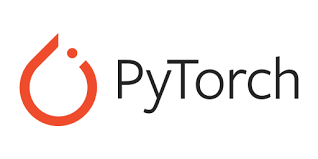



  PyTorch is an open-source machine learning framework that is primarily used for developing and training deep learning models. It was developed by Facebook's AI Research Lab and released in 2016. PyTorch provides a flexible and dynamic approach to building neural networks, making it a popular choice among researchers and developers.

The framework is built on a dynamic computational graph concept, which means that the graph is built and modified on-the-fly as the program runs. This allows for more intuitive and flexible model development, as you can use standard Python control flow statements and debug the model easily.

PyTorch supports automatic differentiation, which enables efficient computation of gradients for training neural networks using backpropagation. It provides a rich set of tools and libraries for tasks such as data loading, model building, optimization, and evaluation.

One of the key advantages of PyTorch is its support for GPU acceleration, allowing you to train models on GPUs to significantly speed up computations. It also has a large and active community, which means there are plenty of resources, tutorials, and pre-trained models available.

PyTorch is often compared to TensorFlow, another popular deep learning framework. While TensorFlow focuses more on static computation graphs, PyTorch emphasizes dynamic computation graphs. This fundamental difference in design philosophy gives PyTorch an edge when it comes to flexibility and ease of use.

Overall, PyTorch is widely used in the research community and is gaining popularity in industry applications as well. It provides a powerful and user-friendly platform for building and training deep learning models.



In [1]:
!pip install torch

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple/


In [1]:
import torch 

In [3]:
# ------------- 
# pytorch basics 
# --------------
tens1 = torch.tensor([1,2,4])       # this is also called as 2d vecotr
tens1
print(tens1 , tens1.shape , end='\n\n\n')
print(tens1.dtype)

tensor([1, 2, 4]) torch.Size([3])


torch.int64


In [4]:
# Matrix
t3 = torch.tensor([
    [5., 6],
    [7,8],
    [9,10]
])
t3

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [5]:
# 3 dimensional array
t4 = torch.tensor([
    [
        [11, 12, 13],
        [14, 15, 16]
    ],
    [
        [17,18,19],
        [20,21,22]
    ]
])

t4

tensor([[[11, 12, 13],
         [14, 15, 16]],

        [[17, 18, 19],
         [20, 21, 22]]])

In [6]:
print(t4.shape)

torch.Size([2, 2, 3])


In [7]:
# create tensors 

X = torch.tensor(4. , requires_grad=True)
W = torch.tensor(4. , requires_grad=True)
B = torch.tensor(5., requires_grad=True)
X , W , B

(tensor(4., requires_grad=True),
 tensor(4., requires_grad=True),
 tensor(5., requires_grad=True))

In [15]:
import torch

X = torch.tensor(4., requires_grad=True)
W = torch.tensor(4., requires_grad=True)
B = torch.tensor(5., requires_grad=True)

y = W * X + B   # simple linear function

y.backward()    # compute gradients


print(X.grad)  # dy/dX = W = 4
print(W.grad)  # dy/dW = X = 4
print(B.grad)  # dy/dB = 1


tensor(4.)
tensor(4.)
tensor(1.)


In [14]:
print(X.grad) # prints the dy / dx


tensor(4.)


In [ ]:
X = torch.tensor(4., requires_grad=False)
W = torch.tensor(4., requires_grad=False)

y = X * W
y.backward()  # ❌ This will raise an error


In [ ]:
X = torch.tensor(4., requires_grad=True)

with torch.no_grad():
    y = X * 3


print(y.requires_grad)  # False


False


In [32]:
X = torch.tensor(2., requires_grad=True)
y = X**2 + 3*X
# You’ll see something like <AddBackward0> showing PyTorch built a computational graph for the operations you've performed on the tensors 
print(y.grad_fn.requires_grad)
print(y.grad_fn.metadata)
print(y.grad_fn.next_functions.count)  
print(y.grad_fn.register_hook)  
print(y.grad_fn.register_prehook)  
# print(y.grad_fn.remove_hook)



True
{}
<built-in method count of tuple object at 0x000002901DEE5FC0>
<built-in method register_hook of AddBackward0 object at 0x00000290658189D0>
<built-in method register_prehook of AddBackward0 object at 0x000002906581B4F0>


In [33]:
X = torch.tensor(4.)
X.requires_grad_()  # now it tracks gradients


tensor(4., requires_grad=True)

Good follow-up — this is exactly the right thing to be confused about.

### What this code does

```python
X = torch.tensor(4., requires_grad=True)

with torch.no_grad():
    y = X * 3

print(y.requires_grad)  # False
```

Even though `X` has `requires_grad=True`, the line:

```python
with torch.no_grad():
```

**temporarily tells PyTorch to stop tracking gradients** for everything inside that block.

So:

* Normally, `y = X * 3` would be tracked and
  → `y.requires_grad == True`
* But inside `torch.no_grad()`
  → PyTorch does **not build a computation graph**
  → `y.requires_grad == False`

---

### Why this is useful

#### 1. Faster code

No gradient tracking = less memory + faster execution.

#### 2. Inference mode

When you're using a trained model to make predictions:

```python
with torch.no_grad():
    predictions = model(inputs)
```

You don’t need gradients because you're not training.

---

### Think of it like this

`requires_grad=True` = "Record everything so I can take derivatives later"
`torch.no_grad()` = "For now, stop recording anything"

Even if a tensor *can* track gradients, `torch.no_grad()` overrides that behavior temporarily.

---

### Quick mental example

Without `no_grad`:

```python
X = torch.tensor(4., requires_grad=True)
y = X * 3
print(y.requires_grad)  # True
```

With `no_grad`:

```python
with torch.no_grad():
    y = X * 3
print(y.requires_grad)  # False
```

---

If you want, I can also explain:

* Difference between `torch.no_grad()` and `.detach()`
* Why gradients sometimes become `None`
* How this affects neural network training loops


Yes — PyTorch provides a few **similar mechanisms to control gradient tracking**, and each has a slightly different use case. Here are the most important ones you’ll see in practice.

---

## 1. `torch.no_grad()` (you already saw this)

**Purpose:** Temporarily disable gradient tracking.

```python
with torch.no_grad():
    y = model(x)
```

* No computation graph is built
* Faster and uses less memory
* Commonly used during **evaluation / inference**

---

## 2. `torch.set_grad_enabled(True/False)`

This is like a more flexible version of `no_grad`.

```python
torch.set_grad_enabled(False)  # turn OFF grads
y = X * 3

torch.set_grad_enabled(True)   # turn ON grads again
```

Often used like this:

```python
is_train = False

with torch.set_grad_enabled(is_train):
    y = model(x)
```

Useful when writing code that works for both training and evaluation.

---

## 3. `.detach()`

Instead of disabling grads for a block, this works on a **specific tensor**.

```python
X = torch.tensor(4., requires_grad=True)

y = X * 3
z = y.detach()

print(z.requires_grad)  # False
```

`detach()` means:

> "Give me a new tensor with the same value, but cut it off from the graph."

Very common in advanced models (GANs, RL, etc.).

---

## 4. `.requires_grad_(False)`

This permanently changes a tensor’s behavior.

```python
X = torch.tensor(4., requires_grad=True)
X.requires_grad_(False)

print(X.requires_grad)  # False
```

Useful when you want to **freeze model parameters**, e.g.:

```python
for param in model.parameters():
    param.requires_grad = False
```

---

## 5. `torch.inference_mode()` (even stronger than `no_grad`)

```python
with torch.inference_mode():
    y = model(x)
```

* Like `no_grad()`, but **even faster**
* Prevents accidental graph building
* Best for production inference

---

## Quick comparison

| Method                     | Scope           | Typical use             |
| -------------------------- | --------------- | ----------------------- |
| `torch.no_grad()`          | Block           | Validation / inference  |
| `torch.set_grad_enabled()` | Block (dynamic) | Training/eval switch    |
| `.detach()`                | Single tensor   | Cut graph for one value |
| `.requires_grad_(False)`   | Tensor          | Freeze weights          |
| `torch.inference_mode()`   | Block           | Fast, safe inference    |

---

If you want, I can next explain this visually with a **computation graph diagram** — that usually makes everything click.


SyntaxError: invalid character '—' (U+2014) (3730257853.py, line 1)